---
## Classification practice on university data <br> <font size=3.4> Dataset:Universities.csv<br><font size=2>K means clustering, KNN classification, Grid search CV, SVM, and other ensemble methods used
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics

In [ ]:
filename= '../Ketan/Datasets/Universities.csv'
df = pd.read_csv(filename)
df

In [3]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])

df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


## K-Means Clustering<br><br><font size=3>Checking via Elbow method for optimum number of clusters

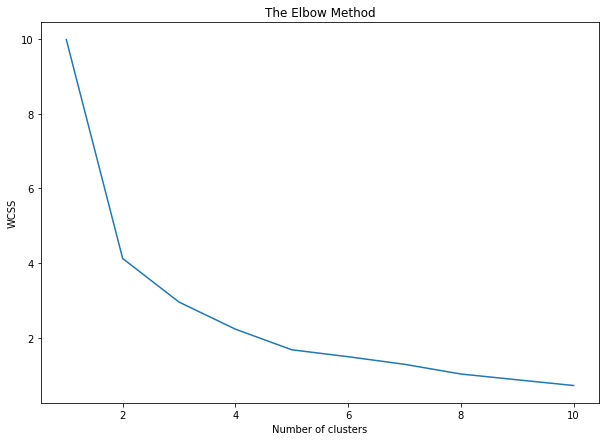

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Confirming the same with Silhouette score

In [5]:
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=42).fit(df_norm).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_norm,labels,metric="euclidean",sample_size=10,random_state=42)))

Silhouette score for k(clusters) = 3 is 0.28132014488502616
Silhouette score for k(clusters) = 4 is 0.4237929295228164
Silhouette score for k(clusters) = 5 is 0.3922654593419859
Silhouette score for k(clusters) = 6 is 0.3922654593419859
Silhouette score for k(clusters) = 7 is 0.3922654593419859
Silhouette score for k(clusters) = 8 is 0.3922654593419859
Silhouette score for k(clusters) = 9 is 0.3922654593419859
Silhouette score for k(clusters) = 10 is 0.34455152511814874
Silhouette score for k(clusters) = 11 is 0.2568906711575215
Silhouette score for k(clusters) = 12 is 0.1364852170760768


### Hence, we can conclude that optimum no of clusters = 4

In [6]:
model=KMeans(n_clusters=4) 
model.fit(df_norm)
model.labels_

array([3, 0, 1, 3, 1, 3, 3, 1, 3, 0, 3, 1, 1, 2, 3, 2, 3, 2, 1, 1, 1, 1,
       1, 2, 3], dtype=int32)

In [7]:
km = pd.Series(model.labels_) 
df['kclust']= km 
df.iloc[:,1:5].groupby(df.kclust).mean()

,SAT,Top10,Accept,SFRatio
kclust,,,,
0,1360.000000,87.500000,34.500000,6.50
1,1253.000000,77.700000,43.500000,12.90
2,1061.500000,38.750000,70.000000,19.25
3,1351.666667,89.444444,21.777778,11.00


In [8]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,kclust
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,1


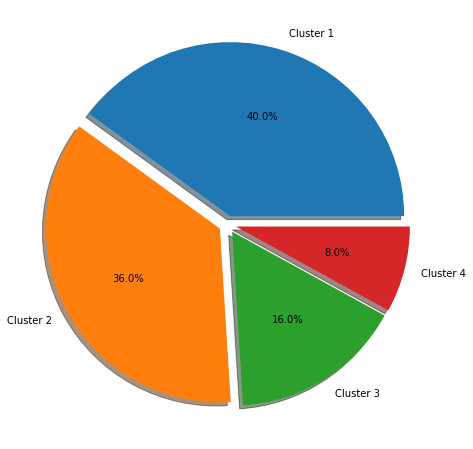

In [9]:
x = df.kclust.value_counts()

cls = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4']
plt.figure(figsize=(10,8))
plt.pie(x, shadow=True, explode=[0.05,0.05,0.05,0.05], autopct='%1.1f%%', labels=cls);

In [10]:
df1 = df.drop(['Univ'],axis=1)
df1

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,kclust
0,1310,89,22,13,22704,94,3
1,1415,100,25,6,63575,81,0
2,1260,62,59,9,25026,72,1
3,1310,76,24,12,31510,88,3
4,1280,83,33,13,21864,90,1
5,1340,89,23,10,32162,95,3
6,1315,90,30,12,31585,95,3
7,1255,74,24,12,20126,92,1
8,1400,91,14,11,39525,97,3
9,1305,75,44,7,58691,87,0


## Classification

### Using grid search cv for best value of k for KNN classification

In [11]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

array = df1.values
X = array[:,1:6]
Y = array[:,6]

n_neighbors = numpy.array(range(1,20))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

print(grid.best_score_)
print(grid.best_params_)

0.8800000000000001
{'n_neighbors': 1}


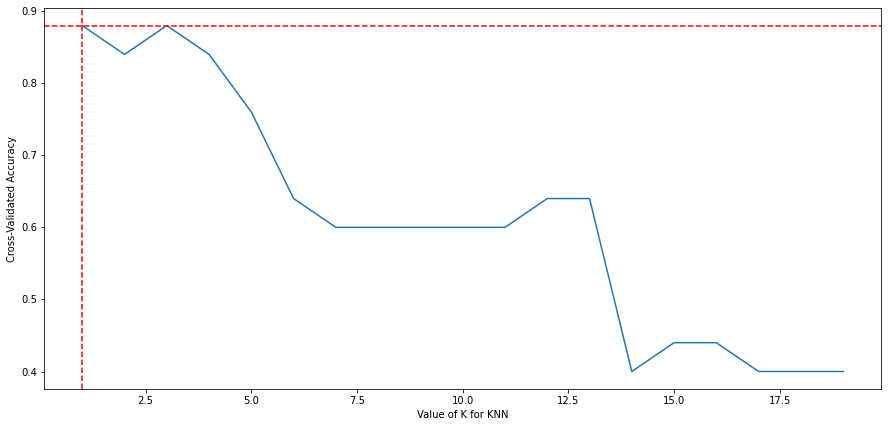

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline
# choose k between 1 to 20
k_range = range(1, 20)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(15,7))
plt.plot(k_range, k_scores)
plt.axhline(y=0.88, linestyle='--', color='red')
plt.axvline(x=1, linestyle='--', color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Hence K=1 is the best value, so we'll make the model using that.

In [13]:
#KNN Classification
from sklearn.model_selection import KFold
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

model = KNeighborsClassifier(n_neighbors=1) #making the model

results = cross_val_score(model, X, Y, cv=kfold)
results.mean()

0.75

In [14]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [15]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],'C':[1,10,100,1000] },
             {'kernel':['linear'],'C':[1,10,100,1000]}]
gsv = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
gsv.fit(X,Y)

gsv.best_params_ , gsv.best_score_ 

({'C': 1, 'kernel': 'linear'}, 0.8833333333333332)

In [16]:
#SVM Clasification
model = SVC(C= 1, kernel='linear') #building the model
results = cross_val_score(model, X, Y, cv=kfold)
results.mean()*100

83.33333333333333

### Now, let's try some Ensemble methods to see if we can further increase the accuracy of the model

### Trial-1: Bagging

In [17]:
# Bagged Decision Trees for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
results.mean()*100

81.66666666666667

### Trial-2: Random Forest

In [18]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
results.mean()*100

83.33333333333333

### Trial-3: Bagging

In [19]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
num_trees = 100
seed=7

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
results.mean()*100

80.0

### Trial-4: Stacking

In [20]:
# Stacking Ensemble for Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [21]:
# create the sub models
from sklearn.linear_model import LogisticRegression

estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = DecisionTreeClassifier()
estimators.append(('cart', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
results.mean()*100

80.0

In [22]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = DecisionTreeClassifier()
estimators.append(('cart', model))
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('Boosting', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
results.mean()*100


81.66666666666667

In [23]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
results.mean()*100



80.0

In [24]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
results.mean()*100


83.33333333333333

In [25]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
results.mean()*100



70.0

### Hence, we can say that SVM/Random Forest/Stacking of Logistic Regression & Boosting is the best predicting model for this dataset